<a href="https://colab.research.google.com/github/Cliff12001/IMSE-441/blob/main/A6_Chap_13_HWb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

In [22]:
data = pd.read_csv('/content/drive/MyDrive/SQC Q#13.19.csv')
data

,A,B,C,D,Replicate
0,-,-,-,-,7.037
1,+,-,-,-,14.707
2,-,+,-,-,11.635
3,+,+,-,-,17.273
4,-,-,+,-,10.403
5,+,-,+,-,4.368
6,-,+,+,-,9.360
7,+,+,+,-,13.440
8,-,-,-,+,8.561
9,+,-,-,+,16.867


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=data #df means data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          32 non-null     object 
 1   B          32 non-null     object 
 2   C          32 non-null     object 
 3   D          32 non-null     object 
 4   Replicate  32 non-null     float64
dtypes: float64(1), object(4)
memory usage: 1.4+ KB


In [6]:
modelA = ols('Replicate ~ A + B + C + D + A:B + A:C + A:D + B:C + B:D + C:D + A:B:C + A:B:D + A:C:D + B:C:D + A:B:C:D', data=df).fit()
aov_table = sm.stats.anova_lm(modelA, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
A,72.908850,1.0,898.338923,1.740225e-15
B,126.460656,1.0,1558.172011,2.247046e-17
C,103.464113,1.0,1274.822456,1.100354e-16
D,30.662280,1.0,377.802146,1.485334e-12
A:B,29.926716,1.0,368.738965,1.790240e-12
A:C,128.496480,1.0,1583.256213,1.979949e-17
A:D,0.046818,1.0,0.576863,4.585895e-01
B:C,0.073728,1.0,0.908432,3.547091e-01
B:D,0.017861,1.0,0.220066,6.453180e-01
C:D,0.047278,1.0,0.582533,4.564284e-01


In [7]:
print(modelA.summary())

                            OLS Regression Results                            
Dep. Variable:              Replicate   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     469.0
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           3.08e-18
Time:                        21:12:13   Log-Likelihood:                 5.8657
No. Observations:                  32   AIC:                             20.27
Df Residuals:                      16   BIC:                             43.72
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Q 13.19

a)

A, AB, AD, ABD, and ABCD. These factors were the highest in the table.

b)

Looking at the anova table we can see what factorsaffect cracking. A, B, C, D, AB, AC, and ABC seemed to affect cracking the most

c)

In [8]:
coefficients = modelA.params

intercept = coefficients['Intercept']

coeff_A = coefficients['A[T.-]']
coeff_B = coefficients['B[T.-]']
coeff_C = coefficients['C[T.-]']
coeff_D = coefficients['D[T.-]']
coeff_A_B = coefficients['A[T.-]:B[T.-]']
coeff_A_C = coefficients['A[T.-]:C[T.-]']
coeff_A_D = coefficients['A[T.-]:D[T.-]']
coeff_B_C = coefficients['B[T.-]:C[T.-]']
coeff_B_D = coefficients['B[T.-]:D[T.-]']
coeff_C_D = coefficients['C[T.-]:D[T.-]']
coeff_A_B_C = coefficients['A[T.-]:B[T.-]:C[T.-]']
coeff_A_B_D = coefficients['A[T.-]:B[T.-]:D[T.-]']
coeff_A_C_D = coefficients['A[T.-]:C[T.-]:D[T.-]']
coeff_B_C_D = coefficients['B[T.-]:C[T.-]:D[T.-]']
coeff_A_B_C_D = coefficients['A[T.-]:B[T.-]:C[T.-]:D[T.-]']

regression_equation = (
    f"Replicate = {intercept:.2f} + "
    f"{coeff_A:.2f} * A + "
    f"{coeff_B:.2f} * B + "
    f"{coeff_C:.2f} * C + "
    f"{coeff_D:.2f} * D + "
    f"{coeff_A_B:.2f} * A:B + "
    f"{coeff_A_C:.2f} * A:C + "
    f"{coeff_A_D:.2f} * A:D + "
    f"{coeff_B_C:.2f} * B:C + "
    f"{coeff_B_D:.2f} * B:D + "
    f"{coeff_C_D:.2f} * C:D + "
    f"{coeff_A_B_C:.2f} * A:B:C + "
    f"{coeff_A_B_D:.2f} * A:B:D + "
    f"{coeff_A_C_D:.2f} * A:C:D + "
    f"{coeff_B_C_D:.2f} * B:C:D + "
    f"{coeff_A_B_C_D:.2f} * A:B:C:D"
)

print("Regression Equation:")
print(regression_equation)

Regression Equation:
Replicate = 15.35 + -4.29 * A + -9.34 * B + 4.38 * C + -2.17 * D + 10.37 * A:B + -1.67 * A:C + 0.42 * A:D + 6.57 * B:C + 0.39 * B:D + -0.02 * C:D + -12.61 * A:B:C + -0.45 * A:B:D + -0.13 * A:C:D + -0.20 * B:C:D + 0.11 * A:B:C:D


Regression Equation:
Replicate = 15.35 + -4.29 * A + -9.34 * B + 4.38 * C + -2.17 * D + 10.37 * A:B + -1.67 * A:C + 0.42 * A:D + 6.57 * B:C + 0.39 * B:D + -0.02 * C:D + -12.61 * A:B:C + -0.45 * A:B:D + -0.13 * A:C:D + -0.20 * B:C:D + 0.11 * A:B:C:D

(1), A, B, C, D, AB, AC, BC, ABC These are the factor effects that appear to be large. From the model summary.

d)

In [9]:
modelA.resid

0     0.3305
1    -0.2560
2    -0.2270
3    -0.2710
4     0.1260
5     0.1350
6     0.0535
7     0.2585
8    -0.1950
9    -0.0925
10    0.1090
11    0.0925
12   -0.2455
13    0.1105
14    0.1275
15    0.3000
16   -0.3305
17    0.2560
18    0.2270
19    0.2710
20   -0.1260
21   -0.1350
22   -0.0535
23   -0.2585
24    0.1950
25    0.0925
26   -0.1090
27   -0.0925
28    0.2455
29   -0.1105
30   -0.1275
31   -0.3000
dtype: float64

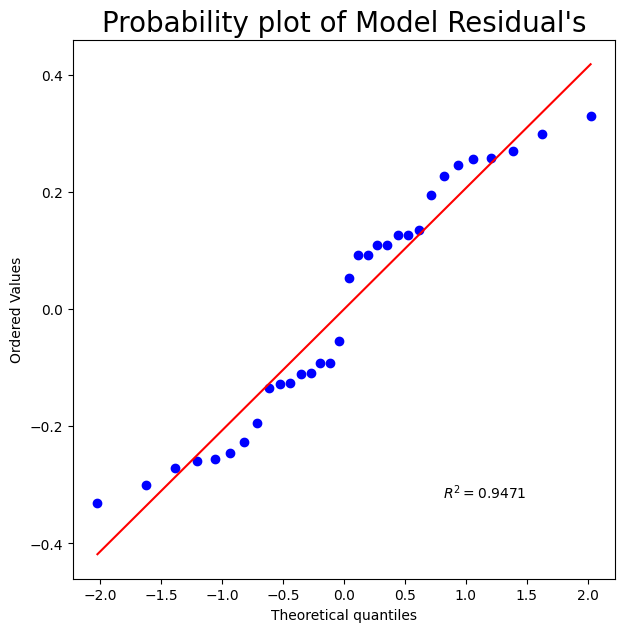

In [10]:
fig = plt.figure(figsize= (7, 7))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(modelA.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of Model Residual's", fontsize= 20)
ax.set

plt.show()

Looking at the Probability plot of ModelA Residual's we can see that according to the "fat pencil test" this data follows normality

e)

This Question has some similarities to part b of question 13.19, therefore A, B, C, D, AB, AC, and ABC seemed to affect cracking the most.

f)

In [11]:
Y=df[['Replicate']]
Y

,Replicate
0,7.037
1,14.707
2,11.635
3,17.273
4,10.403
5,4.368
6,9.360
7,13.440
8,8.561
9,16.867


In [12]:
stats.levene(df['Replicate'][df['A'] == '-'],
             df['Replicate'][df['A'] == '+'])

LeveneResult(statistic=4.663302958097873, pvalue=0.03893355101989784)

In [13]:
stats.levene(df['Replicate'][df['B'] == '-'],
             df['Replicate'][df['B'] == '+'])

LeveneResult(statistic=1.5728405976484332, pvalue=0.2194793731093549)

In [14]:
stats.levene(df['Replicate'][df['C'] == '-'],
             df['Replicate'][df['C'] == '+'])

LeveneResult(statistic=0.9174820409238761, pvalue=0.34579313267859624)

In [15]:
stats.levene(df['Replicate'][df['D'] == '-'],
             df['Replicate'][df['D'] == '+'])

LeveneResult(statistic=0.016814388523183236, pvalue=0.8976928041946247)

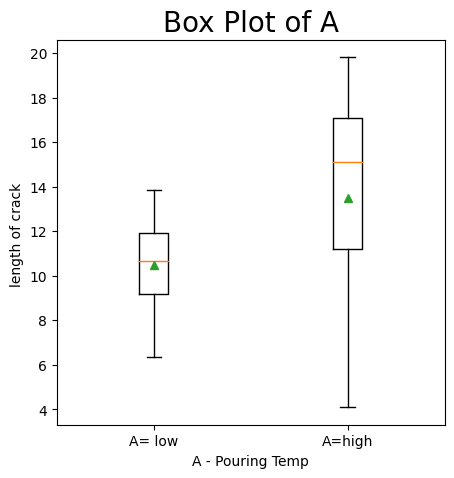

In [16]:
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of A", fontsize= 20)
ax.set

data = [df['Replicate'][df['A'] == '-'],
             df['Replicate'][df['A'] == '+']]


ax.boxplot(data,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("A - Pouring Temp")
plt.ylabel("length of crack ")

plt.show()

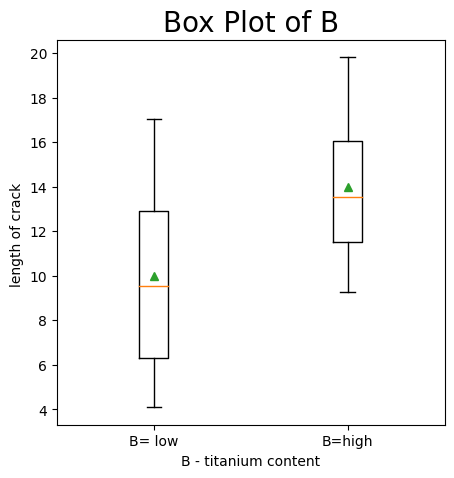

In [17]:
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of B", fontsize= 20)
ax.set

data = [df['Replicate'][df['B'] == '-'],
             df['Replicate'][df['B'] == '+']]


ax.boxplot(data,
           labels= ['B= low', 'B=high'],
           showmeans= True)

plt.xlabel("B - titanium content")
plt.ylabel("length of crack ")

plt.show()

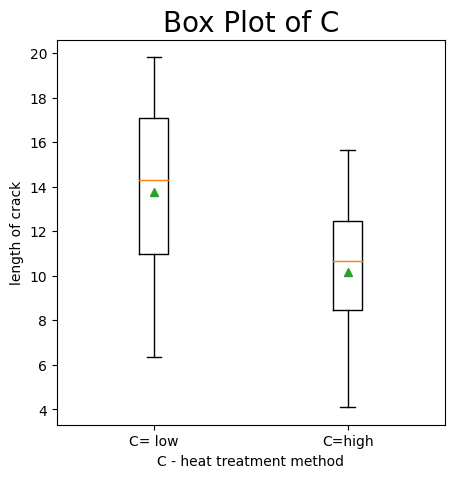

In [18]:
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of C", fontsize= 20)
ax.set

data = [df['Replicate'][df['C'] == '-'],
             df['Replicate'][df['C'] == '+']]


ax.boxplot(data,
           labels= ['C= low', 'C=high'],
           showmeans= True)

plt.xlabel("C - heat treatment method")
plt.ylabel("length of crack")

plt.show()

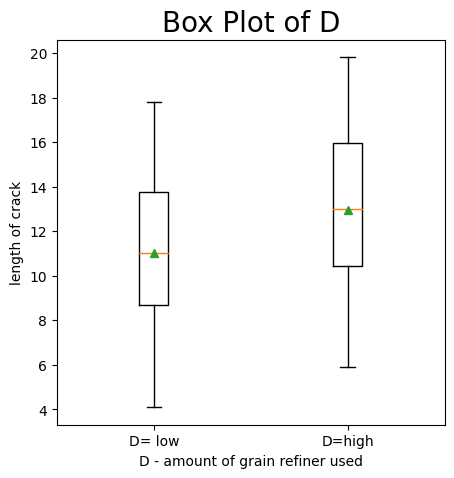

In [19]:
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of D", fontsize= 20)
ax.set

data = [df['Replicate'][df['D'] == '-'],
             df['Replicate'][df['D'] == '+']]


ax.boxplot(data,
           labels= ['D= low', 'D=high'],
           showmeans= True)

plt.xlabel("D - amount of grain refiner used")
plt.ylabel("length of crack")

plt.show()

We can see that from looking at the boxplots. A has the greatest difference in crack lenght between high and low pouring temp. While the boxplots for B, C, and D have a difference there high and low affect on the length of the crack isnt as great.

Q 13.20

a)

In [23]:
Xmain=df[['A', 'B', 'C', 'D']]
Xmain

,A,B,C,D
0,-,-,-,-
1,+,-,-,-
2,-,+,-,-
3,+,+,-,-
4,-,-,+,-
5,+,-,+,-
6,-,+,+,-
7,+,+,+,-
8,-,-,-,+
9,+,-,-,+


In [25]:
dfCminus = data
dfCminus['C'] = dfCminus['C'].replace('+', '-')
dfCminus

,A,B,C,D,Replicate
0,-,-,-,-,7.037
1,+,-,-,-,14.707
2,-,+,-,-,11.635
3,+,+,-,-,17.273
4,-,-,-,-,10.403
5,+,-,-,-,4.368
6,-,+,-,-,9.360
7,+,+,-,-,13.440
8,-,-,-,+,8.561
9,+,-,-,+,16.867


In [26]:
dfCplus = data
dfCplus['C'] = dfCplus['C'].replace('-', '+')
dfCplus

,A,B,C,D,Replicate
0,-,-,+,-,7.037
1,+,-,+,-,14.707
2,-,+,+,-,11.635
3,+,+,+,-,17.273
4,-,-,+,-,10.403
5,+,-,+,-,4.368
6,-,+,+,-,9.360
7,+,+,+,-,13.440
8,-,-,+,+,8.561
9,+,-,+,+,16.867


In [27]:
modelminus = ols('Replicate ~ A + B + C + D + A:B + A:C + A:D + B:C + B:D + C:D + A:B:C + A:B:D + A:C:D + B:C:D + A:B:C:D', data=dfCminus).fit()
print(modelminus.summary())

                            OLS Regression Results                            
Dep. Variable:              Replicate   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     2.857
Date:                Tue, 24 Oct 2023   Prob (F-statistic):             0.0256
Time:                        21:25:18   Log-Likelihood:                -81.850
No. Observations:                  32   AIC:                             179.7
Df Residuals:                      24   BIC:                             191.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               17.5423 

In [28]:
modelplus = ols('Replicate ~ A + B + C + D + A:B + A:C + A:D + B:C + B:D + C:D + A:B:C + A:B:D + A:C:D + B:C:D + A:B:C:D', data=dfCplus).fit()
print(modelplus.summary())

                            OLS Regression Results                            
Dep. Variable:              Replicate   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     2.857
Date:                Tue, 24 Oct 2023   Prob (F-statistic):             0.0256
Time:                        21:25:55   Log-Likelihood:                -81.850
No. Observations:                  32   AIC:                             179.7
Df Residuals:                      24   BIC:                             191.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               17.5423 

In [30]:
coefficients = modelplus.params

intercept = coefficients['Intercept']

coeff_A = coefficients['A[T.-]']
coeff_B = coefficients['B[T.-]']
coeff_D = coefficients['D[T.-]']
coeff_A_B = coefficients['A[T.-]:B[T.-]']
coeff_A_D = coefficients['A[T.-]:D[T.-]']
coeff_B_D = coefficients['B[T.-]:D[T.-]']
coeff_A_B_D = coefficients['A[T.-]:B[T.-]:D[T.-]']

regression_equation = (
    f"Replicate = {intercept:.2f} + "
    f"{coeff_A:.2f} * A + "
    f"{coeff_B:.2f} * B + "
    f"{coeff_D:.2f} * D + "
    f"{coeff_A_B:.2f} * A:B + "
    f"{coeff_A_D:.2f} * A:D + "
    f"{coeff_B_D:.2f} * B:D + "
    f"{coeff_A_B_D:.2f} * A:B:D  "
)

print("Regression Equation C = +:")
print(regression_equation)

Regression Equation C = +:
Replicate = 17.54 + -5.13 * A + -6.06 * B + -2.18 * D + 4.06 * A:B + 0.35 * A:D + 0.29 * B:D + -0.39 * A:B:D  


In [31]:
coefficients = modelminus.params

intercept = coefficients['Intercept']

coeff_A = coefficients['A[T.-]']
coeff_B = coefficients['B[T.-]']
coeff_D = coefficients['D[T.-]']
coeff_A_B = coefficients['A[T.-]:B[T.-]']
coeff_A_D = coefficients['A[T.-]:D[T.-]']
coeff_B_D = coefficients['B[T.-]:D[T.-]']
coeff_A_B_D = coefficients['A[T.-]:B[T.-]:D[T.-]']

regression_equation = (
    f"Replicate = {intercept:.2f} + "
    f"{coeff_A:.2f} * A - "
    f"{coeff_B:.2f} * B - "
    f"{coeff_D:.2f} * D - "
    f"{coeff_A_B:.2f} * A:B - "
    f"{coeff_A_D:.2f} * A:D - "
    f"{coeff_B_D:.2f} * B:D - "
    f"{coeff_A_B_D:.2f} * A:B:D  "
)

print("Regression Equation C = -:")
print(regression_equation)

Regression Equation C = -:
Replicate = 17.54 + -5.13 * A - -6.06 * B - -2.18 * D - 4.06 * A:B - 0.35 * A:D - 0.29 * B:D - -0.39 * A:B:D  


For the two equations there is no difference in the numbers the Cplus is all addition and the Cminus is all subtraction in the formulas.

b)

In [32]:
from sklearn.linear_model import LinearRegression

In [35]:
X=data[['Replicate']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Yhat

array([[ 7.037],
       [14.707],
       [11.635],
       [17.273],
       [10.403],
       [ 4.368],
       [ 9.36 ],
       [13.44 ],
       [ 8.561],
       [16.867],
       [13.876],
       [19.824],
       [11.846],
       [ 6.125],
       [11.19 ],
       [15.653],
       [ 6.376],
       [15.219],
       [12.089],
       [17.815],
       [10.151],
       [ 4.098],
       [ 9.253],
       [12.923],
       [ 8.951],
       [17.052],
       [13.658],
       [19.639],
       [12.337],
       [ 5.904],
       [10.935],
       [15.053]])

In [36]:
from matplotlib import cm

In [51]:
X=df[['A', 'B', 'D']]
X

,A,B,D
0,-,-,-
1,+,-,-
2,-,+,-
3,+,+,-
4,-,-,-
5,+,-,-
6,-,+,-
7,+,+,-
8,-,-,+
9,+,-,+


TypeError: ignored

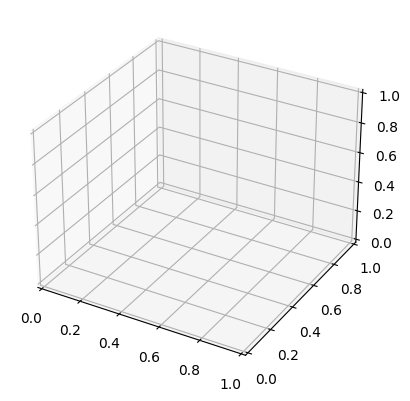

In [48]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=dfCminus['A']
x2=dfCminus['B']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

TypeError: ignored

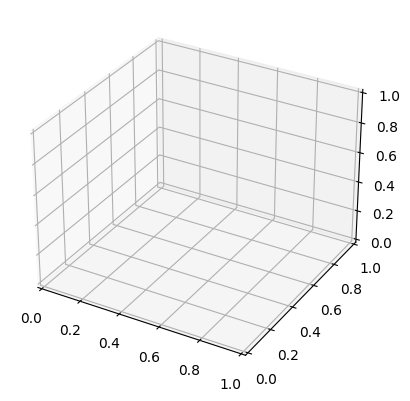

In [50]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=dfCplus['A']
x2=dfCplus['B']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

I could not get the 3D graphs to work with my code.

c)

From the regression model we can see that from the t. the factors (1), A, B, AB would affect it the most based off of C being positive.

d)

We can also see that the Cplus is the same as the Cminus, therefore it is the same. From the regression model we can see that from the t. the factors (1), A, B, AB would affect it the most based off of C being negative.